In [14]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

# ML
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# ensemble(bagging)
from sklearn.ensemble import ( 
  BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
)

#ensemble(boosting)
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


#stacking
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier, StackingRegressor

# 평가
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, classification_report

# 교차검증
from sklearn.model_selection import (
  KFold, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score, GridSearchCV, train_test_split
)

# Feature Selection
from sklearn.feature_selection import RFE, RFECV

# 시각화(SVM은 회귀계수가 나오지 않습니다.)
import eli5
from eli5.sklearn import PermutationImportance
import shap

# 트리 시각화
import graphviz

In [2]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
    print(e)

2022-03-02 11:44:50.387605: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-03-02 11:44:51.349879: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-02 11:44:51.350827: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-02 11:44:51.377408: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-02 11:44:51.378017: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2022-03-02 11:44:51.378043: I tensorflow/stream_executor/platform/default/dso_loade

In [47]:
train=pd.read_csv('/home/lab08/data/train.csv')
test=pd.read_csv('/home/lab08/data/test.csv')
sample_sub=pd.read_csv('/home/lab08/data/sample_submission.csv')

train=train.drop('index', axis=1)
test=test.drop('index', axis=1)

In [48]:
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


## 이상치 정리
- child_num이 7이상인 경우 삭제

In [49]:
train['child_num'].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

In [50]:
del_idx=train.loc[train['child_num'] > 5 ].index
train=train.drop(del_idx)
len(train)

26451

## 변수 생성

In [51]:
def add_var(df):
    #개인정보ID
    df['personal_id']=df['gender']+'_'+df['DAYS_BIRTH'].astype(str)+'_'+df['income_type'].astype(str)
    #카드정보ID
    df['card_id']=df['gender']+ '_'+df['DAYS_BIRTH'].astype(str)+'_'+df['income_total'].astype(str)+'_'+df['income_type'].astype(str)+'_'+df['begin_month'].astype(str)
    
    #gender+car+reality, phone+workphone+email
    df['gcr']=df['gender']+'_'+df['reality']+'_'+df['car']
    df['pwe']=df['phone'].astype(str)+'_'+df['work_phone'].astype(str)+'_'+df['email'].astype(str)
    
    return df

In [52]:
train = add_var(train)
test = add_var(test)

## 변수 전처리

In [42]:
train['family_size'].value_counts()

2.0    14106
1.0     5109
3.0     4632
4.0     2260
5.0      291
6.0       44
7.0        9
Name: family_size, dtype: int64

In [53]:
def preprocessing(df):
    #로그값 추가, 1000 단위로 자르기
    df['income_total_log']=np.log1p(1+df['income_total'])
    df['income_total']=df['income_total']/1000
    
    #0과 양수값으로 치환후 로그값 추가, 일수를 개월수로 변경
    df['DAYS_EMPLOYED']=df['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)
    df['DAYS_EMPLOYED']=np.abs(df['DAYS_EMPLOYED'])
    df['DAYS_EMPLOYED_log']=np.log1p(1+df['DAYS_EMPLOYED'])
    df['DAYS_EMPLOYED']=df['DAYS_EMPLOYED']//30
    
    #양수
    df['begin_month']=df['begin_month'].map(lambda x: 0 if x > 0 else x)
    df['begin_month']=np.abs(df['begin_month'])
    
    #양수로, 개월수로
    df['DAYS_BIRTH']=df['DAYS_BIRTH'].map(lambda x: 0 if x > 0 else x)
    df['DAYS_BIRTH']=np.abs(df['DAYS_BIRTH'])
    df['DAYS_BIRTH']=df['DAYS_BIRTH']//30
    
    #이전 모델링의 영향력 높았던 family size에 child num 더하기
    df['family_child_sum']=df['family_size']+df['child_num']
    
    #이상치
    df.loc[df['family_size']>5,'child_num']=5
    
    #수입 가족인원수로 나눈 비율
    df['income_fam']=df['income_total']/df['family_size']

    #일 시작 시점
    df['BIRTH_EMPLOYED']=df['DAYS_BIRTH']-df['DAYS_EMPLOYED']
    
    return df

In [54]:
train=preprocessing(train)
test=preprocessing(test)

In [55]:
train.head(3)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,personal_id,card_id,gcr,pwe,income_total_log,DAYS_EMPLOYED_log,family_child_sum,income_fam,BIRTH_EMPLOYED
0,F,N,N,0,202.5,Commercial associate,Higher education,Married,Municipal apartment,463,156,1,0,0,0,NaN,2.0,6.0,1.0,F_-13899_Commercial associate,F_-13899_202500.0_Commercial associate_-6.0,F_N_N,0_0_0,12.218505,8.457655,2.0,101.25,307
1,F,N,Y,1,247.5,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,379,51,1,0,0,1,Laborers,3.0,5.0,1.0,F_-11380_Commercial associate,F_-11380_247500.0_Commercial associate_-5.0,F_Y_N,0_0_1,12.419174,7.340836,4.0,82.50,328
2,M,Y,Y,0,450.0,Working,Higher education,Married,House / apartment,636,147,1,0,1,0,Managers,2.0,22.0,2.0,M_-19087_Working,M_-19087_450000.0_Working_-22.0,M_Y_Y,1_0_0,13.017007,8.397508,2.0,225.00,489


## 결측치 제거
- income_type == Pensinoer & DAYS_EMPLOYED == 0
    - 퇴직 후 무직, 연금수령자 (No Work)
-  income_type == Pensinoer & DAYS_EMPLOYED > 0
    - 연금형태의 지원금(?)을 받고 있는 근로자, 미기재 (Not Written)
- income_type !=  Pensinoer & DAYS_EMPLOYED > 0
    - 미기재 (Not Written)
- income_type != Pensinoer & DAYS_EMPLOYED == 0
    - 없음

In [57]:
def occype_pre(df):
    df.loc[df['DAYS_EMPLOYED']==0 , 'occyp_type']='No_work'
    df.loc[df['occyp_type'].isnull(), 'occyp_type']='Not_written'
    
    return df

In [58]:
train=occype_pre(train)
test=occype_pre(test)

In [61]:
print(train['occyp_type'].value_counts(), '\n')
print(test['occyp_type'].value_counts())

Laborers                 4512
No_work                  4440
Not_written              3733
Core staff               2646
Sales staff              2537
Managers                 2167
Drivers                  1572
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            401
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      123
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64 

Laborers                 1699
No_work                  1698
Not_written              1455
Core staff                945
Sales staff               945
Managers                  845
Drivers                   563
High skill tech staff     343
Medicine staff            343
Accountants               339
Cooking staff             198
Security staff            168
Cleanin

## 구간화

In [62]:
def make_bin(array, n): #n:bin갯수
    counts,bin_dividers=np.histogram(array, bins=n)
    cut_categories = pd.cut(array, bin_dividers, labels=[i for i in range(n)], include_lowest=True)
    bined_array=pd.factorize(cut_categories)[0]
    return bined_array


In [67]:
train['DAYS_BIRTH'].value_counts()

459    126
492    114
422    107
471    104
331    102
      ... 
824      1
265      1
823      1
821      1
256      1
Name: DAYS_BIRTH, Length: 570, dtype: int64

In [68]:
train['DAYS_BIRTH']=make_bin(train['DAYS_BIRTH'],10)
test['DAYS_BIRTH']=make_bin(test['DAYS_BIRTH'],10)
train['DAYS_BIRTH'].value_counts()

0    3727
3    3532
1    3494
5    3264
4    2948
2    2757
8    2662
6    2327
7     876
9     864
Name: DAYS_BIRTH, dtype: int64

## 불필요 변수 제거

In [69]:
train=train.drop('FLAG_MOBIL', axis=1)
test=test.drop('FLAG_MOBIL', axis=1)

In [70]:
print(train.shape , test.shape)

(26451, 27) (10000, 26)


## 레이블 생성

In [71]:
train_x = train.drop(['credit'],axis=1)
train_y = train['credit']

In [72]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26451 entries, 0 to 26456
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             26451 non-null  object 
 1   car                26451 non-null  object 
 2   reality            26451 non-null  object 
 3   child_num          26451 non-null  int64  
 4   income_total       26451 non-null  float64
 5   income_type        26451 non-null  object 
 6   edu_type           26451 non-null  object 
 7   family_type        26451 non-null  object 
 8   house_type         26451 non-null  object 
 9   DAYS_BIRTH         26451 non-null  int64  
 10  DAYS_EMPLOYED      26451 non-null  int64  
 11  work_phone         26451 non-null  int64  
 12  phone              26451 non-null  int64  
 13  email              26451 non-null  int64  
 14  occyp_type         26451 non-null  object 
 15  family_size        26451 non-null  float64
 16  begin_month        264

In [77]:
cate_col = [i for i in train_x.columns if train_x[i].dtype == 'object']

def column_index(df, cate_col):
    cols = df.columns.values
    sortidx = np.argsort(cols)
    return sortidx[np.searchsorted(cols, cate_col, sorter=sortidx)]

cate_col_idx = column_index(train_x, cate_col)    

print(cate_col)
print(cate_col_idx)

['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'personal_id', 'card_id', 'gcr', 'pwe']
[ 0  1  2  5  6  7  8 14 17 18 19 20]


In [87]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import log_loss
from tensorflow.keras.utils import to_categorical

In [88]:
cat_models={}

def cat_kfold(max_depth, learning_rate, random_seed):
    
    folds=StratifiedKFold(n_splits=10, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test.shape[0], 3))  
    
    for seed in random_seed:
        for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
            print(f'===================================={n_fold+1}============================================')
            
            X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
            y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]

            # early_stopping 50에서 가장 좋은 점수를 내는 learning_rate를 활용
            cat = CatBoostClassifier(n_estimators=3000, max_depth=max_depth, random_seed=seed, learning_rate=learning_rate, bootstrap_type ='Bernoulli')
            cat.fit(X_train, y_train,
                  eval_set=[(X_train, y_train), (X_val, y_val)],
                  early_stopping_rounds=50, cat_features=cate_col,
                  verbose=100)

            cat_models[n_fold] = cat

            # val 데이터 예측
            predictions = cat.predict_proba(X_val)
            # test 데이터 예측
            test_predictions = cat.predict_proba(test)

            # val 데이터 예측 logloss 값 저장
            logloss=log_loss(to_categorical(y_val), predictions)
            outcomes.append(logloss)
            print(f"FOLD {n_fold+1} : logloss:{logloss}")

            # test 데이터 예측 결과 종합
            # 최종 적으로는 kolds 횟수 만큼 나눠서 평균 값을 활용
            sub+=test_predictions

            print(f'================================================================================\n\n')

    # 저장된 val 데이터 예측 logloss 값의 평균 값으로 성능을 비교
    mean_outcome=np.mean(outcomes)
    print("Mean:{}".format(mean_outcome))
    
    return sub/(folds.n_splits * len(random_seed))

In [89]:
my_submission = cat_kfold(8, 0.04, [1042])

====================================1============================================
0:	learn: 1.0753981	test: 1.0753981	test1: 1.0756713	best: 1.0756713 (0)	total: 27.9ms	remaining: 1m 23s
100:	learn: 0.7226519	test: 0.5282984	test1: 0.6887627	best: 0.6887627 (100)	total: 10.9s	remaining: 5m 13s
200:	learn: 0.7081121	test: 0.5047675	test1: 0.6804164	best: 0.6804164 (200)	total: 24.5s	remaining: 5m 40s
300:	learn: 0.6948572	test: 0.4936975	test1: 0.6769433	best: 0.6769433 (300)	total: 39.4s	remaining: 5m 53s
400:	learn: 0.6802829	test: 0.4882293	test1: 0.6758306	best: 0.6758306 (400)	total: 54.9s	remaining: 5m 55s
500:	learn: 0.6647946	test: 0.4768044	test1: 0.6747590	best: 0.6745568 (491)	total: 1m 10s	remaining: 5m 49s
600:	learn: 0.6493998	test: 0.4684327	test1: 0.6740859	best: 0.6740476 (572)	total: 1m 25s	remaining: 5m 40s
700:	learn: 0.6356173	test: 0.4643336	test1: 0.6738029	best: 0.6737825 (698)	total: 1m 40s	remaining: 5m 29s
800:	learn: 0.6212060	test: 0.4600250	test1: 0.6735021

500:	learn: 0.6661365	test: 0.4546890	test1: 0.6579092	best: 0.6577662 (496)	total: 1m 10s	remaining: 5m 50s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6577661639
bestIteration = 496

Shrink model to first 497 iterations.
FOLD 8 : logloss:0.6577661638819843


====================================9============================================
0:	learn: 1.0757693	test: 1.0757693	test1: 1.0756857	best: 1.0756857 (0)	total: 28.1ms	remaining: 1m 24s
100:	learn: 0.7226928	test: 0.5303318	test1: 0.6836614	best: 0.6836614 (100)	total: 11.1s	remaining: 5m 19s
200:	learn: 0.7069787	test: 0.4819708	test1: 0.6741479	best: 0.6741479 (200)	total: 25s	remaining: 5m 47s
300:	learn: 0.6918905	test: 0.4669193	test1: 0.6702980	best: 0.6702980 (300)	total: 39.1s	remaining: 5m 50s
400:	learn: 0.6775509	test: 0.4601551	test1: 0.6681667	best: 0.6681559 (399)	total: 54.4s	remaining: 5m 52s
500:	learn: 0.6640879	test: 0.4562651	test1: 0.6678244	best: 0.6678136 (493)	total: 1m 9s	remainin

In [90]:
def plot_feature_importance(importance, names, model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

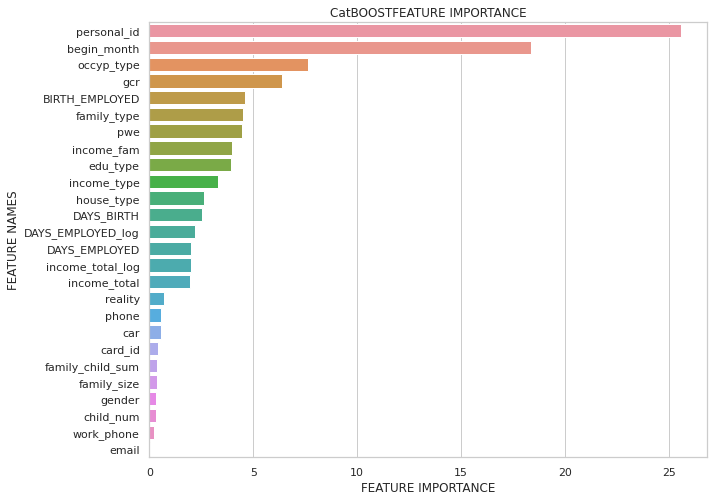

In [91]:
plot_feature_importance(cat_models[0].get_feature_importance(), train_x.columns,'CatBOOST')


In [92]:
train=

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26451 entries, 0 to 26456
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             26451 non-null  object 
 1   car                26451 non-null  object 
 2   reality            26451 non-null  object 
 3   child_num          26451 non-null  int64  
 4   income_total       26451 non-null  float64
 5   income_type        26451 non-null  object 
 6   edu_type           26451 non-null  object 
 7   family_type        26451 non-null  object 
 8   house_type         26451 non-null  object 
 9   DAYS_BIRTH         26451 non-null  int64  
 10  DAYS_EMPLOYED      26451 non-null  int64  
 11  work_phone         26451 non-null  int64  
 12  phone              26451 non-null  int64  
 13  email              26451 non-null  int64  
 14  occyp_type         26451 non-null  object 
 15  family_size        26451 non-null  float64
 16  begin_month        264

In [93]:
train.to_csv('/home/lab08/data/train_catmodeling1.csv')
test.to_csv('/home/lab08/data/test_catmodeling1.csv')